In [3]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np


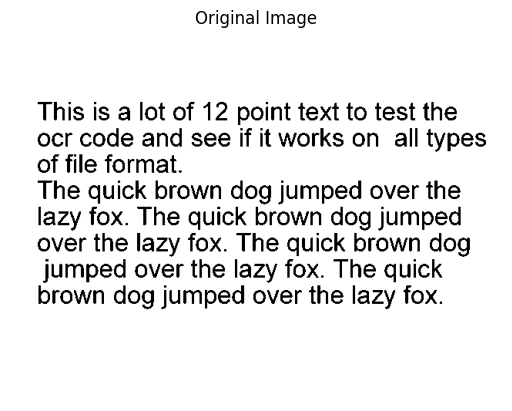

In [4]:
# Load the image
image = cv2.imread('test1.png')

# Convert BGR to RGB for displaying using plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


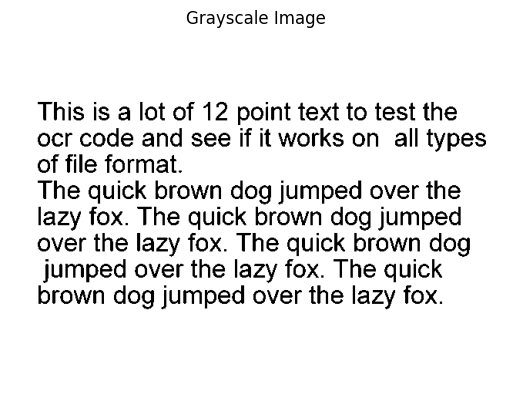

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


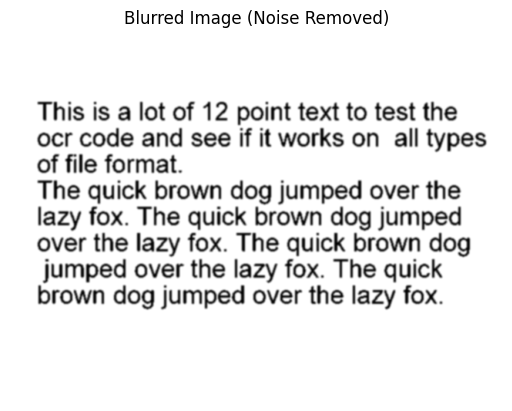

In [6]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image (Noise Removed)')
plt.axis('off')
plt.show()


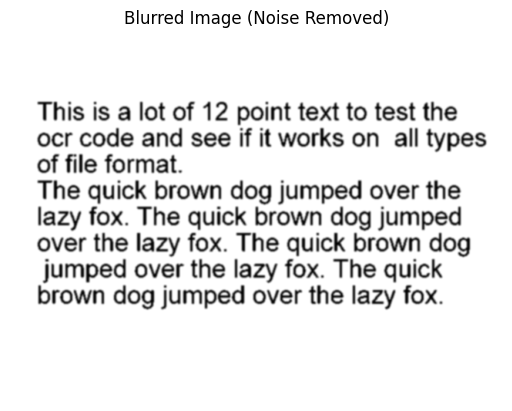

In [7]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image (Noise Removed)')
plt.axis('off')
plt.show()


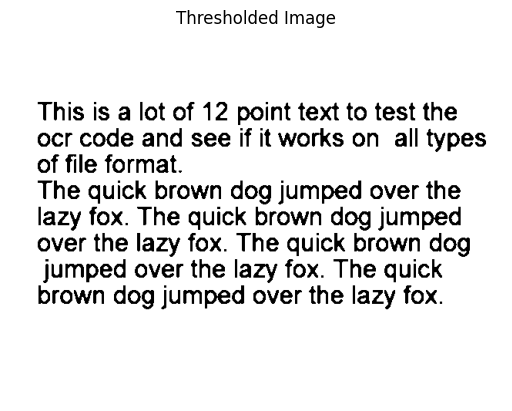

In [19]:
# Apply thresholding
_, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


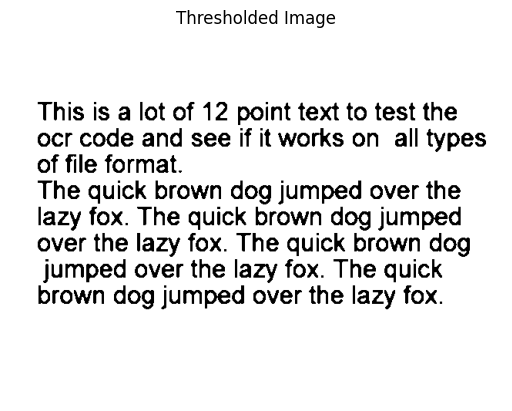

In [14]:

_, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


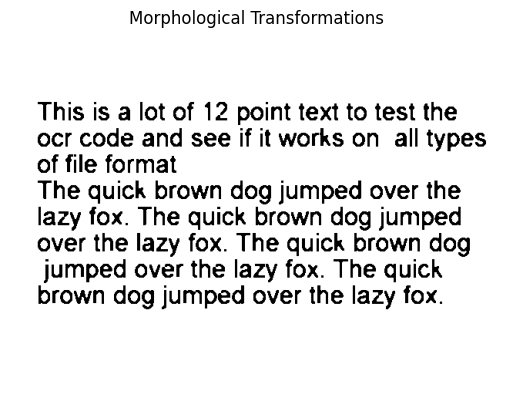

In [15]:
# Define a rectangular kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply morphological transformations (e.g., dilation)
morphed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Display the morphed image
plt.imshow(morphed, cmap='gray')
plt.title('Morphological Transformations')
plt.axis('off')
plt.show()


In [16]:
# Perform OCR on the processed image
text = pytesseract.image_to_string(morphed, lang='eng')  # Specify language if needed

# Print the recognized text
print("Recognized Text:")
print(text)


Recognized Text:
This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [17]:
image = cv2.imread('test1.png')
h, w, _ = image.shape
boxes = pytesseract.image_to_boxes(image, lang='eng')

for box in boxes.splitlines():
    char, x1, y1, x2, y2, _ = box.split()
    x1, y1, x2, y2 = int(x1), h - int(y2), int(x2), h - int(y1)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2.imshow('Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
from pytesseract import image_to_data
import cv2
import pandas as pd

image = cv2.imread('test1.png')
data = image_to_data(image, lang='eng', output_type='dict')

# Create a DataFrame for better visualization
df = pd.DataFrame(data)
print(df)

# Highlight words in the image
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:  # Filter based on confidence
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Word Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    640   
1       2         1          1        0         0         0    36   92    582   
2       3         1          1        1         0         0    36   92    582   
3       4         1          1        1         1         0    36   92    544   
4       5         1          1        1         1         1    36   92     60   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
67      5         1          1        2         5         3   196  330    108   
68      5         1          1        2         5         4   316  336     63   
69      5         1          1        2         5         5   388  330     45   
70      5         1          1        2         5         6   445  330     55   
71      5         1          1        2         5         7   511  330     50   

    height  conf    text  
